# Hypothesis Driven Correlations

Due to the dead end in the previous section (i.e. Targeted Features and Correlation), we decided to constrain the dataset even further driven by a new hypothesis: the majority of the mine workers are young, male and uneducated.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
%matplotlib inline

In [3]:
# With the dataset with small scale mines
# Dataset location
dfBig = "glss4_5_6_alignedfclmalnllsm_igc.csv"

# Read in a CSV file and store the contents in a dataframe (df)
bigdf = pd.read_csv(dfBig, low_memory=False, sep=',')
bigdf.head()

,hhid,glss,year,region,clust,nh,pid,sex,mining_region,age,...,distance_nearestmine,nearest_activemine,distance_nearestactivemine,nearest_activemine2010,distance_nearestactivemine2010,tag,_merge_glss_lsm,id_igcsmallmine,distance_igcsmallmine,_merge
0,14.0,4,98.0,1.0,4002,14.0,4.0,2.0,1.0,9.0,...,62704.211,CHICHIWERE,62704.211,IDUAPRIEM /TEBEREBIE,88868.063,0.0,matched (3),92.0,65993.984,matched (3)
1,7.0,4,98.0,1.0,4002,7.0,1.0,1.0,1.0,29.0,...,62704.211,CHICHIWERE,62704.211,IDUAPRIEM /TEBEREBIE,88868.063,0.0,matched (3),92.0,65993.984,matched (3)
2,12.0,4,98.0,1.0,4002,12.0,13.0,1.0,1.0,4.0,...,62704.211,CHICHIWERE,62704.211,IDUAPRIEM /TEBEREBIE,88868.063,0.0,matched (3),92.0,65993.984,matched (3)
3,12.0,4,98.0,1.0,4002,12.0,1.0,1.0,1.0,51.0,...,62704.211,CHICHIWERE,62704.211,IDUAPRIEM /TEBEREBIE,88868.063,0.0,matched (3),92.0,65993.984,matched (3)
4,16.0,4,98.0,1.0,4002,16.0,1.0,2.0,1.0,70.0,...,62704.211,CHICHIWERE,62704.211,IDUAPRIEM /TEBEREBIE,88868.063,0.0,matched (3),92.0,65993.984,matched (3)


### Data Cleaning
Similar to the previous section, we need to first clean the dataset by removing all null values and only keeping the data points of young male and uneducated workers. Here, we define the age range of 15-29 to be "young".

In [4]:
dfm = bigdf[["year", "male", "age", "educ_attainment", "school_attendance", "rexpenditurepc", "poor", "rincpc" , "literacy_any", "ill", "unemployed", "x", "y", "distance_nearestmine", "distance_igcsmallmine"]]
dfm.shape

(136285, 15)

In [5]:
dfm.head()

,year,male,age,educ_attainment,school_attendance,rexpenditurepc,poor,rincpc,literacy_any,ill,unemployed,x,y,distance_nearestmine,distance_igcsmallmine
0,98.0,0.0,9.0,less than primary,1.0,368.25598,1.0,94.246384,0.0,0.0,NaN,-2.80928,5.03186,62704.211,65993.984
1,98.0,1.0,29.0,MSLC/BECE/VOC,0.0,363.77664,1.0,67.633965,1.0,0.0,0.0,-2.80928,5.03186,62704.211,65993.984
2,98.0,1.0,4.0,NaN,NaN,573.92303,1.0,251.470870,NaN,0.0,NaN,-2.80928,5.03186,62704.211,65993.984
3,98.0,1.0,51.0,MSLC/BECE/VOC,0.0,573.92303,1.0,251.470870,1.0,0.0,0.0,-2.80928,5.03186,62704.211,65993.984
4,98.0,0.0,70.0,never in school,0.0,1440.28280,0.0,843.664060,0.0,1.0,NaN,-2.80928,5.03186,62704.211,65993.984


In [6]:
# Remove NaN's in the male column
dfm = dfm[dfm["male"] > 0]
dfm.shape

(65739, 15)

In [7]:
# only keep the males in the age range of 14-30
dfm["young"] = (dfm["age"] > 14) & (dfm["age"] < 30)
dfm = dfm[dfm["young"] == True]
dfm.head()

,year,male,age,educ_attainment,school_attendance,rexpenditurepc,poor,rincpc,literacy_any,ill,unemployed,x,y,distance_nearestmine,distance_igcsmallmine,young
1,98.0,1.0,29.0,MSLC/BECE/VOC,0.0,363.77664,1.0,67.633965,1.0,0.0,0.0,-2.80928,5.03186,62704.211,65993.984,True
10,98.0,1.0,16.0,less than primary,1.0,252.22647,1.0,27.992922,1.0,0.0,NaN,-2.80928,5.03186,62704.211,65993.984,True
12,98.0,1.0,22.0,Secondary or higher,0.0,252.22647,1.0,27.992922,1.0,0.0,0.0,-2.80928,5.03186,62704.211,65993.984,True
16,98.0,1.0,27.0,MSLC/BECE/VOC,0.0,479.94366,0.0,178.144840,1.0,1.0,0.0,-2.80928,5.03186,62704.211,65993.984,True
17,98.0,1.0,15.0,less than primary,1.0,409.70401,0.0,44.485355,0.0,0.0,NaN,-2.80928,5.03186,62704.211,65993.984,True


In [8]:
# remove the columns male, age and young as they do not give any more information gain
dfm = dfm.drop(['male', 'age', 'young'], axis=1)
dfm.shape

(16962, 13)

In order to discard the records of educated people, we first make the column "education attainment" categorical and store its mapping to a number. In such a way, all data points of people who have been to some higher education can be easily removed. We keep the information on literacy and unemployed for later research.

In [9]:
# Make education attainment categorical

dfm['educ_attainment'] = pd.Categorical(dfm['educ_attainment'])

# store the education mapping
edumap = dict(enumerate(dfm['educ_attainment'].cat.categories))
print(edumap)

import csv
with open('educationmapping.csv', 'w') as f:
    w = csv.DictWriter(f, edumap.keys())
    w.writeheader()
    w.writerow(edumap)
    
dfm.head()

{0: 'MSLC/BECE/VOC', 1: 'Secondary or higher', 2: 'complete primary but less than BECE/MSLC', 3: 'less than primary ', 4: 'never in school'}


,year,educ_attainment,school_attendance,rexpenditurepc,poor,rincpc,literacy_any,ill,unemployed,x,y,distance_nearestmine,distance_igcsmallmine
1,98.0,MSLC/BECE/VOC,0.0,363.77664,1.0,67.633965,1.0,0.0,0.0,-2.80928,5.03186,62704.211,65993.984
10,98.0,less than primary,1.0,252.22647,1.0,27.992922,1.0,0.0,NaN,-2.80928,5.03186,62704.211,65993.984
12,98.0,Secondary or higher,0.0,252.22647,1.0,27.992922,1.0,0.0,0.0,-2.80928,5.03186,62704.211,65993.984
16,98.0,MSLC/BECE/VOC,0.0,479.94366,0.0,178.144840,1.0,1.0,0.0,-2.80928,5.03186,62704.211,65993.984
17,98.0,less than primary,1.0,409.70401,0.0,44.485355,0.0,0.0,NaN,-2.80928,5.03186,62704.211,65993.984


In [10]:
# new column EDU for just the education code
dfm['edu'] = dfm.educ_attainment.cat.codes

# remove the column educ_attainment
dfm = dfm.drop(['educ_attainment'], axis=1)

dfm.head()

,year,school_attendance,rexpenditurepc,poor,rincpc,literacy_any,ill,unemployed,x,y,distance_nearestmine,distance_igcsmallmine,edu
1,98.0,0.0,363.77664,1.0,67.633965,1.0,0.0,0.0,-2.80928,5.03186,62704.211,65993.984,0
10,98.0,1.0,252.22647,1.0,27.992922,1.0,0.0,NaN,-2.80928,5.03186,62704.211,65993.984,3
12,98.0,0.0,252.22647,1.0,27.992922,1.0,0.0,0.0,-2.80928,5.03186,62704.211,65993.984,1
16,98.0,0.0,479.94366,0.0,178.144840,1.0,1.0,0.0,-2.80928,5.03186,62704.211,65993.984,0
17,98.0,1.0,409.70401,0.0,44.485355,0.0,0.0,NaN,-2.80928,5.03186,62704.211,65993.984,3


In [11]:
# Drop all data point of people that have been to MSLC/BECE/VOC, OR Secondary or higher, i.e. code > 1
dfm = dfm[dfm['edu'] > 1]
dfm.shape

(6132, 13)

In [12]:
dfm.describe()
dfm.dtypes

year                     float64
school_attendance        float64
rexpenditurepc           float64
poor                     float64
rincpc                   float64
literacy_any             float64
ill                      float64
unemployed               float64
x                        float64
y                        float64
distance_nearestmine     float64
distance_igcsmallmine    float64
edu                         int8
dtype: object

In [13]:
dfm.isnull().any()

year                     False
school_attendance        False
rexpenditurepc           False
poor                     False
rincpc                   False
literacy_any              True
ill                       True
unemployed                True
x                         True
y                         True
distance_nearestmine      True
distance_igcsmallmine     True
edu                      False
dtype: bool

In [14]:
# Clean up literacy and unemployed
dfm.literacy_any.unique()
dfm.unemployed.unique()

# remove nans in literacy
dfm = dfm[dfm['literacy_any'] > -0.1]

# remove nans in unemployed
dfm = dfm[dfm['unemployed'] > -0.1]

dfm.shape

(5404, 13)

In [15]:
# Clean up columns: x, y, ill
dfm = dfm[dfm["x"]>0]
dfm = dfm[dfm["y"]>0]
dfm = dfm[dfm["ill"]>-0.5]
dfm.shape
dfm.isnull().any()

year                     False
school_attendance        False
rexpenditurepc           False
poor                     False
rincpc                   False
literacy_any             False
ill                      False
unemployed               False
x                        False
y                        False
distance_nearestmine     False
distance_igcsmallmine    False
edu                      False
dtype: bool

### Data Visualisation

In the scatter plots we can see a direct relationship between the distances of large scale and small scale mines, implying that small scale mines can often be found in the vicinity of large scale mines.

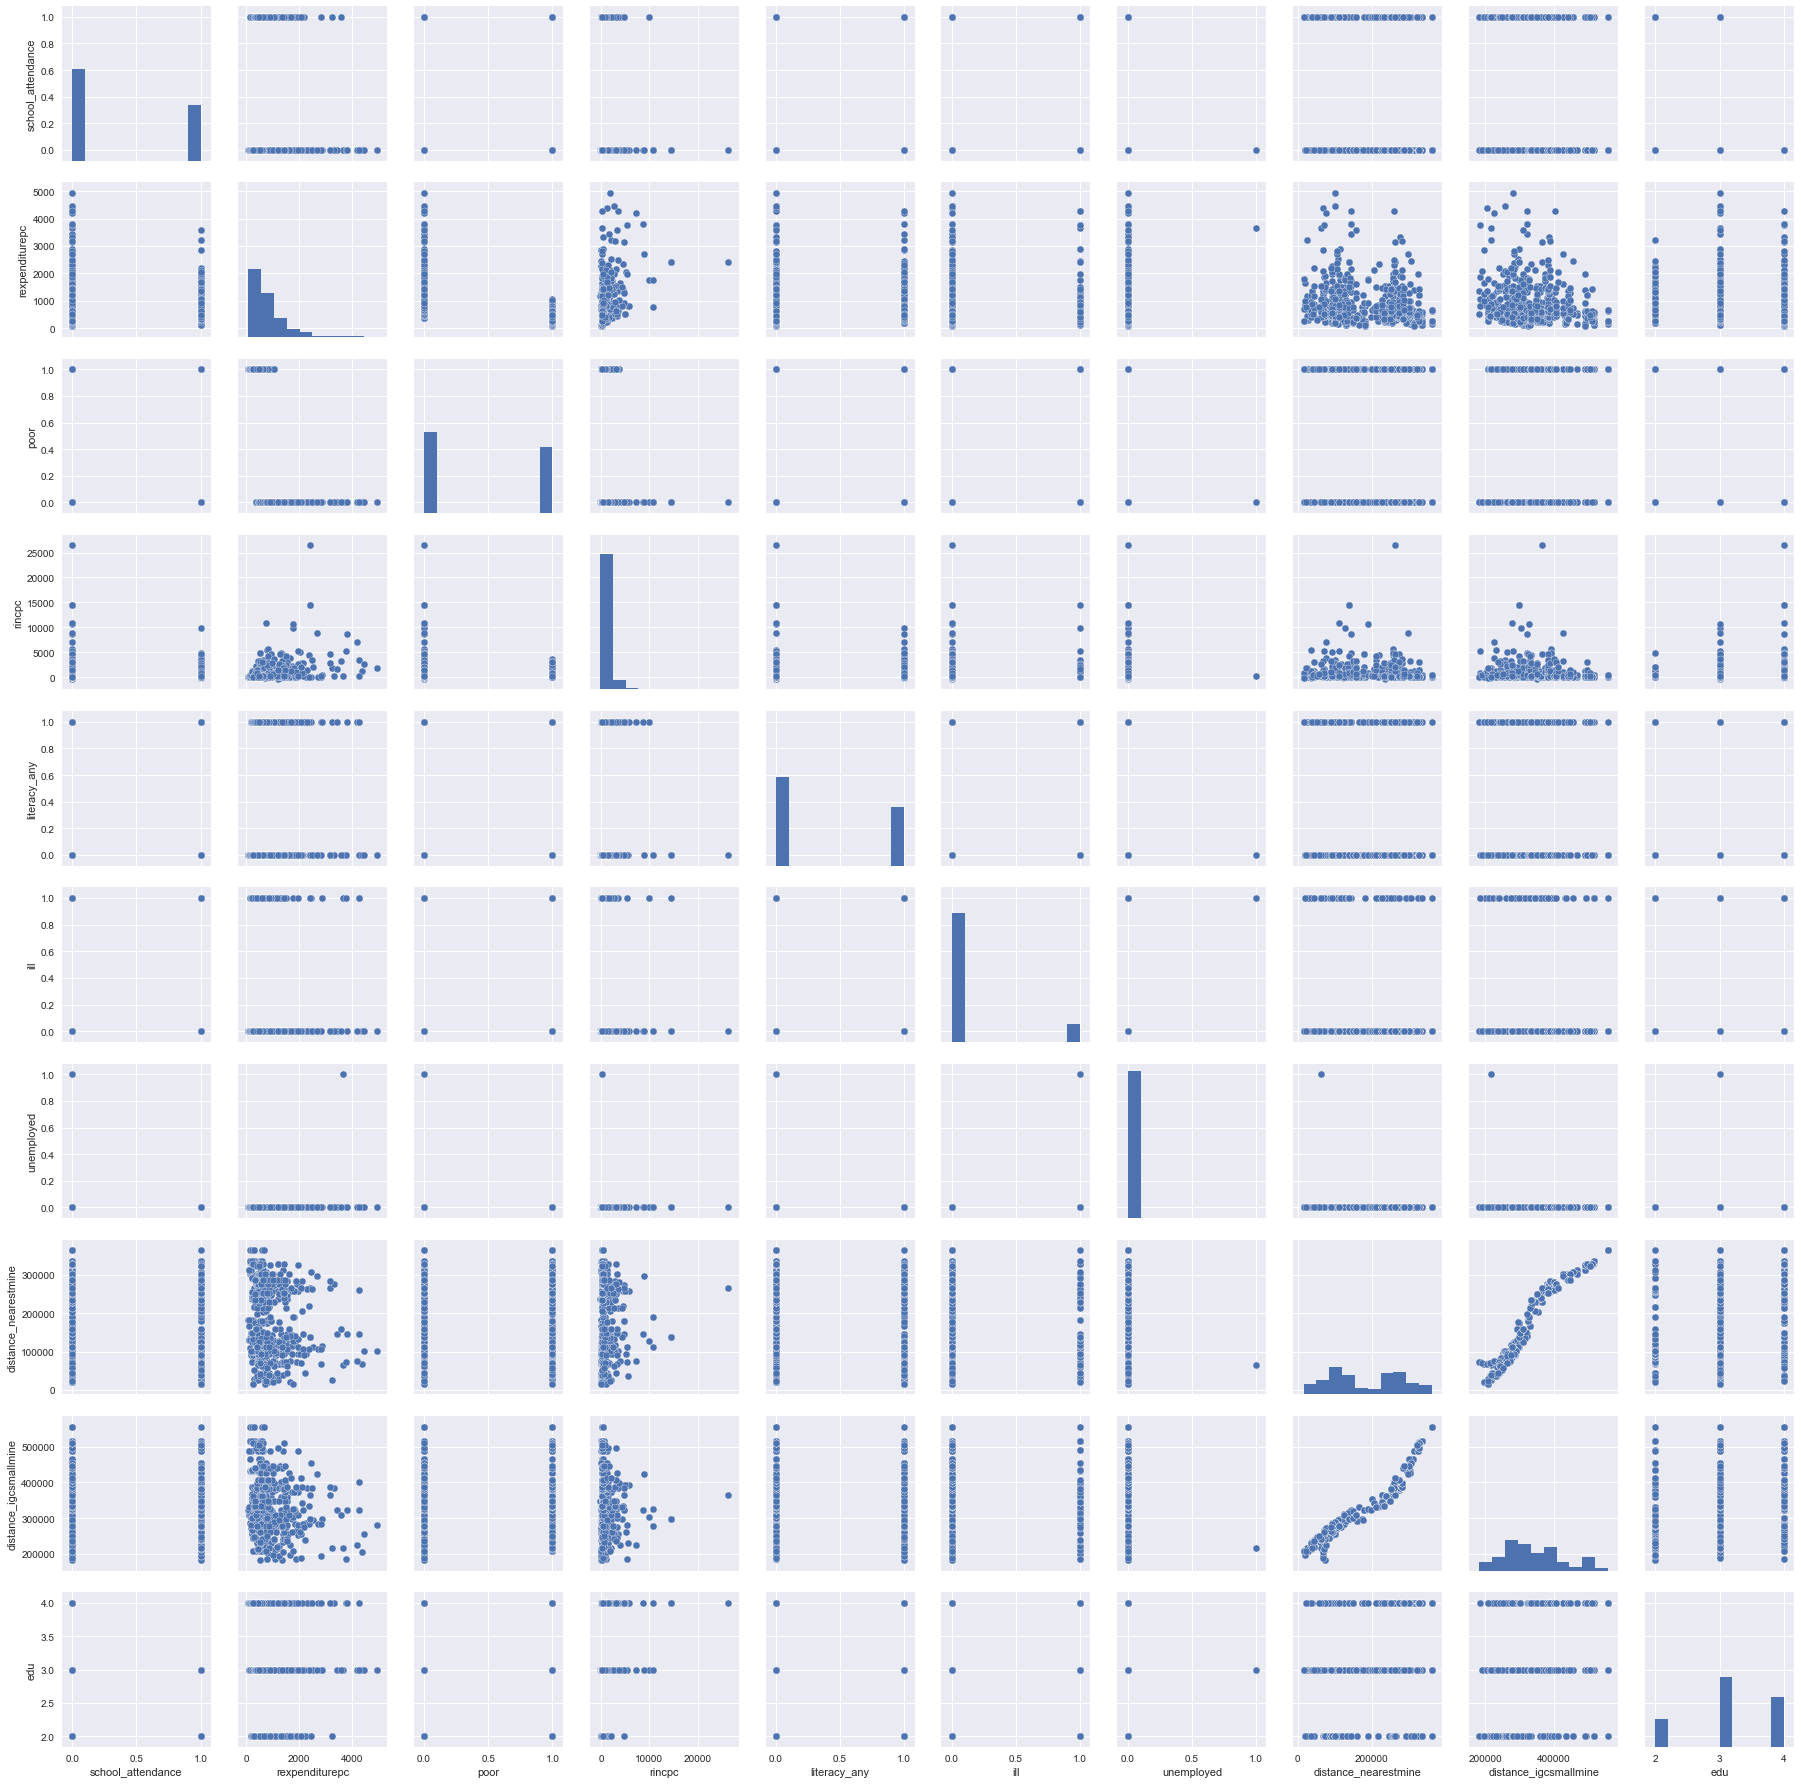

In [16]:
sns.set()
cols = list(dfm)
cols.remove('x')
cols.remove('y')
cols.remove('year')
sns.pairplot(dfm[cols], size=2.5)
plt.show()

### Linear Regression

Attempts of a linear regression on the distance of large / small scale mines based on the more constrained datasets have proven futile with similar error rates as before.

In [18]:
# Linear regression on distance to small scale mines

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Use only one feature
Ghana_X = dfm

# Split the data into training/testing sets
Ghana_X_train = Ghana_X[:-20]
Ghana_X_test = Ghana_X[-20:]

Ghana_X_train = Ghana_X_train.drop(['distance_igcsmallmine'], axis=1)
Ghana_X_test = Ghana_X_test.drop(['distance_igcsmallmine'], axis=1)

print(Ghana_X_train.shape)

# Split the targets into training/testing sets
Ghana_y_train = Ghana_X.distance_igcsmallmine[:-20]
Ghana_y_test = Ghana_X.distance_igcsmallmine[-20:]

print(Ghana_y_train.shape)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Ghana_X_train, Ghana_y_train)

# Make predictions using the testing set
Ghana_y_pred = regr.predict(Ghana_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Ghana_y_test, Ghana_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Ghana_y_test, Ghana_y_pred))

(685, 12)
(685,)
Coefficients: 
 [ -2.57427192e+00   2.97775544e+03   1.39449563e+00   1.15897752e+03
  -5.57076712e-01  -8.01920792e+02   1.67579819e+01   7.19128771e+03
   1.05006980e+05   6.34072319e+04   2.72073208e-02  -1.76369910e+03]
Mean squared error: 729622968.54
Variance score: -13.15


In [19]:
# Linear regression on distance to large scale mines

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Use only one feature
Ghana_X = dfm

# Split the data into training/testing sets
Ghana_X_train = Ghana_X[:-20]
Ghana_X_test = Ghana_X[-20:]

Ghana_X_train = Ghana_X_train.drop(['distance_nearestmine'], axis=1)
Ghana_X_test = Ghana_X_test.drop(['distance_nearestmine'], axis=1)

print(Ghana_X_train.shape)

# Split the targets into training/testing sets
Ghana_y_train = Ghana_X.distance_nearestmine[:-20]
Ghana_y_test = Ghana_X.distance_nearestmine[-20:]

print(Ghana_y_train.shape)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Ghana_X_train, Ghana_y_train)

# Make predictions using the testing set
Ghana_y_pred = regr.predict(Ghana_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Ghana_y_test, Ghana_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Ghana_y_test, Ghana_y_pred))

(685, 12)
(685,)
Coefficients: 
 [ -4.24586522e-02   7.41933319e+03   6.03388096e+00   1.25229642e+03
  -4.34590913e-02   4.50874310e+02  -3.02206902e+02   8.71514264e+03
   8.30966616e+04   6.47923181e+04   6.78570365e-02   1.09240149e+04]
Mean squared error: 366684795.40
Variance score: -86.68


In [21]:
dfm.dtypes

year                     float64
school_attendance        float64
rexpenditurepc           float64
poor                     float64
rincpc                   float64
literacy_any             float64
ill                      float64
unemployed               float64
x                        float64
y                        float64
distance_nearestmine     float64
distance_igcsmallmine    float64
edu                         int8
dtype: object

TypeError: cannot perform reduce with flexible type

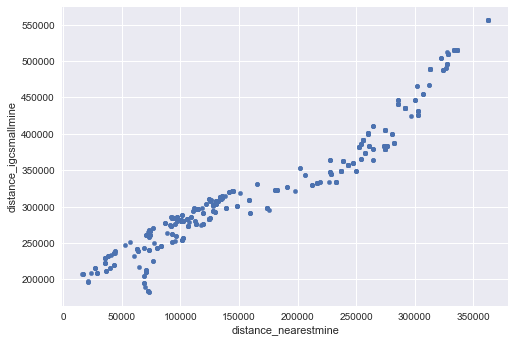

In [22]:
# Correlation between distance to large scale mines and distance to small scale mines

xvar = 'distance_nearestmine'
yvar = 'distance_igcsmallmine'
data = pd.concat([dfm[yvar], dfm[xvar]], axis=1)
data.plot.scatter(x=xvar, y=yvar)

xfit = np.array([np.amin(xvar), np.amax(xvar)])

# fit with np.polyfit
#z = np.polyfit(xvar, yvar, 1)
#p = np.poly1d(z)
#data.plot(x, p(x), '-')